<a href="https://colab.research.google.com/github/MuayThaiLegz/PracticeCrazy/blob/main/ReviewofTimeS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from dmba import regressionSummary

Colab environment detected.


In [2]:
import math, random, json
from datetime import datetime, timedelta

import pandas as pd
from IPython.display import display
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from mpl_toolkits.mplot3d import Axes3D

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope

import warnings
warnings.filterwarnings('ignore')


import random
import json
from datetime import datetime, timedelta


from scipy.interpolate import make_interp_spline
#from bson import ObjectId
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, make_scorer, roc_auc_score
from statsmodels.tsa.arima.model import ARIMA
import joblib
import os
import math
import random
import json
RANDOM_SEED = np.random.seed(0)
from datetime import datetime, timedelta

import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Input

RANDOM_SEED = np.random.seed(0)


In [3]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d %H:%M:%S.%f')

start_date = datetime(2020,10,11)
end_date = datetime(2022,1,1)

# vars = ['payload.fCnt', 'BatV', 'Hum_SHT', 'TempC_DS', 'TempC_SHT', 'Autumn',
#        'Spring', 'Summer', 'Winter','2020.0', '2021.0', '2022.0',
#        '2023.0', 'BatV_lag_1', 'BatV_lag_2', 'Hum_SHT_lag_1', 'Hum_SHT_lag_2',
#        'TempC_DS_lag_1', 'TempC_DS_lag_2', 'TempC_SHT_lag_1',
#        'TempC_SHT_lag_2', 'payload.fCnt_lag_1', 'payload.fCnt_lag_2',
#        'Hum_SHT_roll_mean', 'Hum_SHT_roll_std', 'TempC_DS_roll_mean',
#        'TempC_DS_roll_std', 'TempC_SHT_roll_mean', 'TempC_SHT_roll_std',
#        'BatV_growth', 'Hum_SHT_trend', 'TempC_SHT_trend', 'TempC_DS_trend']

Hum = ['Hum_SHT','Hum_SHT_lag_1','Hum_SHT_lag_2']

TempC = ['TempC_DS','TempC_DS_lag_1','TempC_DS_lag_2']

TempC_SHT = ['TempC_SHT','TempC_SHT_lag_1','TempC_SHT_lag_2']

BatV = ["BatV","BatV_lag_1","BatV_lag_2"]

solo = ["BatV","Hum_SHT","TempC_DS",'TempC_SHT']

class_labels = ['IsolationForest_Anomaly',
       'LocalOutlierFactor_Anomaly',
       'OneClassSVM_Anomaly','Autoencoder_Anomaly',
       'Final_Anomaly']

reg_labels = ['IsolationForest_AnomalyScore','LocalOutlierFactor_AnomalyScore',  'Autoencoder_reconstruction_error','OneClassSVM_AnomalyScore']




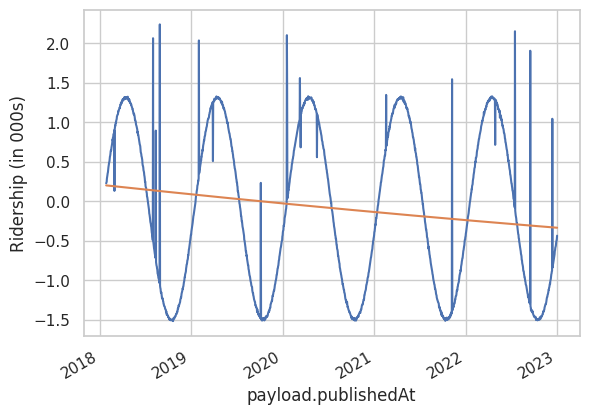

In [29]:

deviceA_anomalies = pd.read_csv('labeled_data.csv', index_col='payload.publishedAt', parse_dates=True)

deviceA_anomalies.index = pd.DatetimeIndex(deviceA_anomalies.index,freq=deviceA_anomalies.index.inferred_freq)

traindata = deviceA_anomalies[start_date:end_date][solo+class_labels+reg_labels]
testdata = deviceA_anomalies[end_date + timedelta(days=1):]


deviceA_anomalies_sample = deviceA_anomalies[solo].resample('D').mean() # +class_labels

traindfNum = deviceA_anomalies_sample.select_dtypes(np.number)#[['BatV',"SMAShort","SMALong"]]

ridership_ts = pd.Series(deviceA_anomalies.TempC_DS.values,index=deviceA_anomalies.index,name='TempC_DS')
ridership_ts.index = pd.DatetimeIndex(ridership_ts.index,freq=ridership_ts.index.inferred_freq)

traindfNum["AbnormalLevels"] = 0.0
position = False


# deviceA_anomalies["SMAShort"] = deviceA_anomalies["BatV"].rolling(window=20).mean()
# deviceA_anomalies["SMALong"] = deviceA_anomalies["BatV"].rolling(window=200).mean()
# deviceA_anomaliesLong = deviceA_anomalies['BatV']
ridership_df = tsatools.add_trend(ridership_ts, trend='ct')

ridership_df['trend'] = range(len(ridership_df))

ridership_df['trend_squared'] = ridership_df['trend'] ** 2

ridership_lm = sm.ols(formula='TempC_DS ~ trend + trend_squared', data=ridership_df).fit()

ax = ridership_ts.plot()
ax.set_xlabel('time')
ax.set_ylabel('Ridership (in 000s)')
ridership_lm.predict(ridership_df).plot(ax=ax)
plt.show()

In [ ]:
# fit linear model using training set and predict on validation set
ridership_lm = sm.ols(formula='Ridership ~ trend', data=train_df).fit()
predict_df = ridership_lm.predict(valid_df)
# create the plot
def singleGraphLayout(ax, ylim, train_df, valid_df):
  ax.set_xlim('1990', '2004-6')
  ax.set_ylim(*ylim)
  ax.set_xlabel('Time')
  one_month = pd.Timedelta('31 days')
  xtrain = (min(train_df.index), max(train_df.index) - one_month)
  xvalid = (min(valid_df.index) + one_month, max(valid_df.index) -
  one_month)
  xtv = xtrain[1] + 0.5 * (xvalid[0] - xtrain[1])
  ypos = 0.9 * ylim[1] + 0.1 * ylim[0]
  ax.add_line(plt.Line2D(xtrain, (ypos, ypos), color='black',
  linewidth=0.5))
  ax.add_line(plt.Line2D(xvalid, (ypos, ypos), color='black',
  linewidth=0.5))
  ax.axvline(x=xtv, ymin=0, ymax=1, color='black', linewidth=0.5)
  ypos = 0.925 * ylim[1] + 0.075 * ylim[0]
  ax.text('1995', ypos, 'Training')
  ax.text('2002-3', ypos, 'Validation')
def graphLayout(axes, train_df, valid_df):
  singleGraphLayout(axes[0], [1300, 2550], train_df, valid_df)
  singleGraphLayout(axes[1], [-550, 550], train_df, valid_df)
  train_df.plot(y='Ridership', ax=axes[0], color='C0', linewidth=0.75)
  valid_df.plot(y='Ridership', ax=axes[0], color='C0', linestyle='dashed',

  linewidth=0.75)

  axes[1].axhline(y=0, xmin=0, xmax=1, color='black', linewidth=0.5)
  axes[0].set_xlabel('')
  axes[0].set_ylabel('Ridership (in 000s)')
  axes[1].set_ylabel('Forecast Errors')
  if axes[0].get_legend():
    axes[0].get_legend().remove()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7.5))
ridership_lm.predict(train_df).plot(ax=axes[0], color='C1')
ridership_lm.predict(valid_df).plot(ax=axes[0], color='C1',
linestyle='dashed')
residual = train_df.Ridership - ridership_lm.predict(train_df)
residual.plot(ax=axes[1], color='C1')
residual = valid_df.Ridership - ridership_lm.predict(valid_df)
residual.plot(ax=axes[1], color='C1', linestyle='dashed')
graphLayout(axes, train_df, valid_df)
plt.tight_layout()
plt.show()

In [5]:
# ax = deviceA_anomalies['BatV'].plot()
# ax.set_xlabel('Time')

# ax.set_ylabel(f'{ridership_ts.name} (in 000s)')
# ax.set_ylim(-2.125, 2.125)


In [6]:

# ax = deviceA_anomalies['OneClassSVM_AnomalyScore'].plot()
# ax.set_xlabel('Time')

# ax.set_ylabel(f'{ridership_ts.name} (in 000s)')
# ax.set_ylim(-42.125, 12.125)

In [8]:
# ax = ridership_ts.plot()
# ax.set_xlabel('Time')

# ax.set_ylabel(f'{ridership_ts.name} (in 000s)')
# ax.set_ylim(-2.125, 2.125)

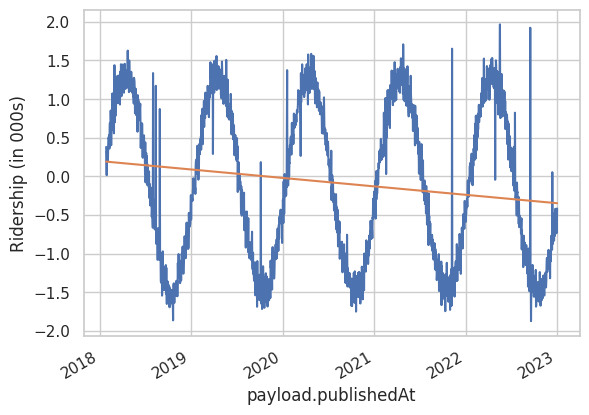

In [ ]:
ridership_ts_3yrs = traindata['2018':'2021']['BatV']

ridership_df = tsatools.add_trend(ridership_ts, trend='ctt')

ridership_lm = sm.ols(formula='BatV ~ trend + trend_squared', data=ridership_df).fit()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
ridership_ts_3yrs.plot(ax=axes[0])
ridership_ts.plot(ax=axes[1])
for ax in axes:
  ax.set_xlabel('Time')

ax.set_ylabel('Ridership (in 000s)')
ridership_lm.predict(ridership_df).plot(ax=axes[1])
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the CSV file and set the index
deviceA_anomalies = pd.read_csv('labeled_data.csv', index_col='payload.publishedAt', parse_dates=True)

# Resample the data to daily frequency
deviceA_anomalies_sample = deviceA_anomalies.resample('D').mean()

# Define the start and end dates
start_date = pd.to_datetime("2020-10-11")
end_date = pd.to_datetime("2021-12-31")

# Select the desired columns from the data
traindata = deviceA_anomalies_sample[start_date:end_date]#[['BatV', "class_labels", "reg_labels"]]
testdata = deviceA_anomalies_sample[end_date + pd.DateOffset(days=1):]

# Create the ridership time series
ridership_ts = traindata['BatV']

# Set the trend variables
traindata['trend'] = range(len(traindata))
traindata['trend_squared'] = traindata['trend'] ** 2

# Fit the linear regression model
ridership_lm = sm.ols(formula='BatV ~ trend + trend_squared', data=traindata).fit()
nValid = 60
nTrain = len(ridership_ts) - nValid
train_ts = ridership_ts[:nTrain]
valid_ts = ridership_ts[nTrain:]
# generate the naive and seasonal naive forecast
naive_pred = pd.Series(train_ts[-1],
index=valid_ts.index)
last_season = train_ts[-12:]
seasonal_pred = pd.Series(pd.concat([last_season]*5) [:len(valid_ts)].values,index=valid_ts.index)

# Plot the time series and forecasts
plt.figure(figsize=(9, 7))
plt.plot(ridership_ts, color='C0', linewidth=0.75)
plt.plot(valid_ts, color='C0', linestyle='dashed', linewidth=0.75)
plt.plot(naive_pred, color='green')
plt.plot(seasonal_pred, color='orange')

# Set the x-axis and y-axis labels
plt.xlabel('Time')
plt.ylabel('Ridership (in 000s)')

# Add lines and arrows for reference
one_month = pd.DateOffset(months=1)
xtrain = (min(train_ts.index), max(train_ts.index) - one_month)
xvalid = (min(valid_ts.index) + one_month, max(valid_ts.index) - one_month)
xfuture = (max(valid_ts.index) + one_month, pd.to_datetime('2006'))
xtv = xtrain[1] + 0.5 * (xvalid[0] - xtrain[1])
xvf = xvalid[1] + 0.5 * (xfuture[0] - xvalid[1])
plt.axvline(x=xtv, ymin=0, ymax=1, color='black', linewidth=0.5)
plt.axvline(x=xvf, ymin=0, ymax=1, color='black', linewidth=0.5)
plt.axhline(y=2450, xmin=0, xmax=1, color='black', linewidth=0.5)
plt.show()


In [ ]:
nValid = 60
nTrain = len(ridership_ts) - nValid
train_ts = ridership_ts[:nTrain]
valid_ts = ridership_ts[nTrain:]
# generate the naive and seasonal naive forecast
naive_pred = pd.Series(train_ts[-1],
index=valid_ts.index)
last_season = train_ts[-12:]
seasonal_pred = pd.Series(pd.concat([last_season]*5) [:len(valid_ts)].values,index=valid_ts.index)


ax = train_ts.plot(color='C0', linewidth=0.75, figsize=(9,7))
valid_ts.plot(ax=ax, color='C0', linestyle='dashed',
linewidth=0.75)



ax.set_xlabel('Time')
ax.set_ylabel('Ridership (in 000s)')
naive_pred.plot(ax=ax, color='green')
seasonal_pred.plot(ax=ax, color='orange')

# determine coordinates for drawing the arrows and lines
one_month = pd.Timedelta('200 days')
xtrain = (min(train_ts.index), max(train_ts.index) -
one_month)
xvalid = (min(valid_ts.index) + one_month,
max(valid_ts.index) - one_month)
xfuture = (max(valid_ts.index) + one_month, '2006')
xtv = xtrain[1] + 0.5 * (xvalid[0] - xtrain[1])
xvf = xvalid[1] + 0.5 * (xfuture[0] - xvalid[1])
ax.add_line(plt.Line2D(xtrain, (2450, 2450),
color='black', linewidth=0.5))
ax.add_line(plt.Line2D(xvalid, (2450, 2450),
color='black', linewidth=0.5))
ax.add_line(plt.Line2D(xfuture, (2450, 2450),
color='black', linewidth=0.5))

ax.axvline(x=xtv, ymin=0, ymax=1, color='black',
linewidth=0.5)
ax.axvline(x=xvf, ymin=0, ymax=1, color='black',
linewidth=0.5)
plt.show()

In [ ]:
regressionSummary(valid_ts, naive_pred)

In [ ]:
regressionSummary(train_ts[1:], train_ts[:-1])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the CSV file and set the index
deviceA_anomalies = pd.read_csv('labeled_data.csv', index_col='payload.publishedAt', parse_dates=True)

# Resample the data to daily frequency
deviceA_anomalies_sample = deviceA_anomalies.resample('D').mean()

# Define the start and end dates
start_date = pd.to_datetime("2020-10-11")
end_date = pd.to_datetime("2021-12-31")

# Select the desired columns from the data
traindata = deviceA_anomalies_sample[start_date:end_date]
testdata = deviceA_anomalies_sample[end_date + pd.DateOffset(days=1):]

# Create the ridership time series
ridership_ts = traindata['BatV']

# Set the trend variables
traindata['trend'] = range(len(traindata))
traindata['trend_squared'] = traindata['trend'] ** 2

# Fit the linear regression model
ridership_lm = sm.ols(formula='BatV ~ trend + trend_squared', data=traindata).fit()

# Calculate the number of validation samples
nValid = 60
nTrain = len(ridership_ts) - nValid

# Generate the naive and seasonal naive forecasts
naive_pred = pd.Series(traindata['BatV'].iloc[-1], index=testdata.index)
last_season = traindata['BatV'].iloc[-12:]
seasonal_pred = pd.Series(np.tile(last_season, len(testdata)//12 + 1)[:len(testdata)], index=testdata.index)

# Plot the time series and forecasts
plt.figure(figsize=(9, 7))
plt.plot(ridership_ts, color='C0', linewidth=0.75)
plt.plot(ridership_ts.iloc[nTrain:], color='C0', linestyle='dashed', linewidth=0.75)
plt.plot(naive_pred, color='green')
plt.plot(seasonal_pred, color='orange')

# Set the x-axis and y-axis labels
plt.xlabel('Time')
plt.ylabel('Ridership (in 000s)')

# Add lines and arrows for reference
one_month = pd.DateOffset(months=1)
xtrain = (min(ridership_ts.index), max(ridership_ts.index) - one_month)
xvalid = (min(ridership_ts.iloc[nTrain:].index) + one_month, max(ridership_ts.iloc[nTrain:].index) - one_month)
xfuture = (max(testdata.index) + one_month, pd.to_datetime('2006'))
xtv = xtrain[1] + 0.5 * (xvalid[0] - xtrain[1])
xvf = xvalid[1] + 0.5 * (xfuture[0] - xvalid[1])
plt.axvline(x=xtv, ymin=0, ymax=1, color='black', linewidth=0.5)
plt.axvline(x=xvf, ymin=0, ymax=1, color='black', linewidth=0.5)
plt.axhline(y=2, xmin=0, xmax=1, color='black', linewidth=0.5)
plt.show()


In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

In [ ]:


ridership_df['trend_squared'] = ridership_df['trend'] ** 2

In [ ]:
||# fit a linear trend model to the time series
ridership_df = tsatools.add_trend(ridership_df, trend="ct")
ridership_lm = sm.ols(formula='BatV ~ trend + trend_squared', data=ridership_df).fit()

# shorter and longer time series
ax = ridership_ts.plot()
ax.set_xlabel('time')
ax.set_ylabel('Ridership (in 000s)')
ridership_lm.predict(ridership_df).plot(ax=ax)
plt.show()